In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
os.getcwd()

'/Users/Tavo/Data_science'

In [3]:
planets = pd.read_csv('./Planets/cumulative.csv')

In [4]:
planets.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,...,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,koi_dikco_fra,koi_dikco_fra_err,koi_dikco_fdec,koi_dikco_fdec_err,koi_dikco_fsky,koi_dikco_fsky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Active,2015-09-18,CANDIDATE,0,0,...,0.280,0.180,0.300,0.150,NaN,NaN,NaN,NaN,NaN,NaN
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Active,2015-09-18,CANDIDATE,0,0,...,0.140,0.280,0.440,0.280,NaN,NaN,NaN,NaN,NaN,NaN
2,3,10811496,K00753.01,NaN,CANDIDATE,Active,2015-09-18,CANDIDATE,0,0,...,-0.031,0.073,0.031,0.073,NaN,NaN,NaN,NaN,NaN,NaN
3,4,10848459,K00754.01,NaN,CANDIDATE,Active,2015-09-18,CANDIDATE,0,0,...,0.100,0.078,0.279,0.076,NaN,NaN,NaN,NaN,NaN,NaN
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Active,2015-09-18,CANDIDATE,0,0,...,-0.010,0.160,0.080,0.190,NaN,NaN,NaN,NaN,NaN,NaN


### Let's simplify and get rid of some of the columns that might give us similar information

In [5]:
planets = planets.drop(['kepid', 'kepler_name'], axis=1)

### There are many columns with a high number of null values. Let's fix this

In [6]:
planets.isnull().sum().values

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       4507,    0,  357,  357,    0,  357,  357,    0,  357,  357,  357,
       8826, 8826, 8826, 8826, 8826,  357,  357,  357,    0,  357,  357,
       8826, 8826, 8826,  357,  357,  357,  357,  357,  357,  357,  357,
        357,    0,  357,  357,  357,  357, 8826, 8826,  361, 8826, 8826,
        357, 8826, 8826,  357,  357,  357,  357,  357,  357,  357,  357,
        357,  357,  357,    0, 1356, 1356,  357,    0, 1356,  448,  448,
       1356, 8826,  357, 8826, 8826,  410,  448,  357,  461,  478,  357,
        461,  461,  461,  470,  470,  357,  461,  461,  357,  461,  461,
       8826, 8826, 8826,  357,    0,    0,    1,   37,    9,  142,  562,
         23,   23,   23,  868,  827,  827,  827,  827,  780,  780,  780,
        780,  833,  833,  823,  823,  950,  950,  950,  950,  950,  950,
       8004, 8004, 8004, 8004, 8004, 8004,  926,  926,  926,  926,  926,
        926, 8004, 8004, 8004, 8004, 8004, 8826])

In [7]:
planets.dtypes

rowid                   int64
kepoi_name             object
koi_disposition        object
koi_vet_stat           object
koi_vet_date           object
koi_pdisposition       object
koi_fpflag_nt           int64
koi_fpflag_ss           int64
koi_fpflag_co           int64
koi_fpflag_ec           int64
koi_disp_prov          object
koi_comment            object
koi_period            float64
koi_period_err1       float64
koi_period_err2       float64
koi_time0bk           float64
koi_time0bk_err1      float64
koi_time0bk_err2      float64
koi_time0             float64
koi_time0_err1        float64
koi_time0_err2        float64
koi_eccen             float64
koi_eccen_err1        float64
koi_eccen_err2        float64
koi_longp             float64
koi_longp_err1        float64
koi_longp_err2        float64
koi_impact            float64
koi_impact_err1       float64
koi_impact_err2       float64
                       ...   
koi_fwm_sdeco         float64
koi_fwm_sdeco_err     float64
koi_fwm_pr

### But before let's separate quantitative and indicator variables, which might simplify our analysis

In [8]:
df = planets
categorical = []
for col in df.columns.values:
    if df[col].dtype == 'object':
        categorical.append(col)

df_category = df[categorical]
df_quant = df.drop(categorical, axis=1)

In [9]:
df_category.head()

,kepoi_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_disp_prov,koi_comment,koi_fittype,koi_limbdark_mod,koi_parm_prov,koi_tce_delivname,koi_quarters,koi_trans_mod,koi_datalink_dvr,koi_datalink_dvs,koi_sparprov
0,K00752.01,CONFIRMED,Active,2015-09-18,CANDIDATE,q1_q17_dr24_koi,NaN,MCMC,Claret (2011 A&A 529 75) ATLAS LS,q1_q17_dr24_koi,q1_q17_dr24_tce,11111111111111111000000000000000,Mandel and Agol (2002 ApJ 580 171),010/010797/010797460/dv/kplr010797460-20141002...,010/010797/010797460/dv/kplr010797460-001-2014...,stellar_q1_q16
1,K00752.02,CONFIRMED,Active,2015-09-18,CANDIDATE,q1_q17_dr24_koi,NaN,MCMC,Claret (2011 A&A 529 75) ATLAS LS,q1_q17_dr24_koi,q1_q17_dr24_tce,11111111111111111000000000000000,Mandel and Agol (2002 ApJ 580 171),010/010797/010797460/dv/kplr010797460-20141002...,010/010797/010797460/dv/kplr010797460-002-2014...,stellar_q1_q16
2,K00753.01,CANDIDATE,Active,2015-09-18,CANDIDATE,q1_q17_dr24_koi,NaN,MCMC,Claret (2011 A&A 529 75) ATLAS LS,q1_q17_dr24_koi,q1_q17_dr24_tce,11111101110111011000000000000000,Mandel and Agol (2002 ApJ 580 171),010/010811/010811496/dv/kplr010811496-20141002...,010/010811/010811496/dv/kplr010811496-001-2014...,stellar_q1_q16
3,K00754.01,CANDIDATE,Active,2015-09-18,CANDIDATE,q1_q17_dr24_koi,EYEBALL---SIGNIF_OFFSET,MCMC,Claret (2011 A&A 529 75) ATLAS LS,q1_q17_dr24_koi,q1_q17_dr24_tce,11111110111011101000000000000000,Mandel and Agol (2002 ApJ 580 171),010/010848/010848459/dv/kplr010848459-20141002...,010/010848/010848459/dv/kplr010848459-001-2014...,stellar_q1_q16
4,K00755.01,CONFIRMED,Active,2015-09-18,CANDIDATE,q1_q17_dr24_koi,NaN,MCMC,Claret (2011 A&A 529 75) ATLAS LS,q1_q17_dr24_koi,q1_q17_dr24_tce,1111111111111111000000000000000,Mandel and Agol (2002 ApJ 580 171),010/010854/010854555/dv/kplr010854555-20141002...,010/010854/010854555/dv/kplr010854555-001-2014...,stellar_q1_q16


In [10]:
df_quant.head()

,rowid,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err,koi_dikco_fra,koi_dikco_fra_err,koi_dikco_fdec,koi_dikco_fdec_err,koi_dikco_fsky,koi_dikco_fsky_err
0,1,0,0,0,0,9.488031,2.950000e-05,-2.950000e-05,170.538450,0.002380,...,0.280,0.180,0.300,0.150,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,0,0,0,54.418464,2.686000e-04,-2.686000e-04,162.510260,0.003970,...,0.140,0.280,0.440,0.280,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0,0,0,0,19.899140,5.920000e-06,-5.920000e-06,175.850425,0.000230,...,-0.031,0.073,0.031,0.073,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,0,0,0,1.736952,2.330000e-07,-2.330000e-07,170.307583,0.000104,...,0.100,0.078,0.279,0.076,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,0,0,0,2.525593,3.665000e-06,-3.665000e-06,171.595130,0.001100,...,-0.010,0.160,0.080,0.190,NaN,NaN,NaN,NaN,NaN,NaN


### We define functions to deal with the big number of null values in some of the columns

In [11]:
def null_value_quant(dataframe, thresh_null):
    for col in dataframe.columns.values:
        if np.sum(dataframe[col].isnull()) > thresh_null:
            dataframe.drop(col, axis=1, inplace=True)
            print(col)
        elif np.sum(dataframe[col].isnull()) > 0:
            median = dataframe[col].median()
            idx = np.where(dataframe[col].isnull())[0]
            dataframe[col].iloc[idx] = median
    return

In [12]:
def null_value_categorical(dataframe, thresh_null):
    for col in dataframe.columns.values:
        if np.sum(dataframe[col].isnull()) > thresh_null:
            dataframe.drop(col, axis=1, inplace=True)
            print(col)
        elif np.sum(dataframe[col].isnull()) > 0:
            dataframe[col] = dataframe[col].fillna('MIA', inplace=True)
    return

In [13]:
null_value_quant(df_quant, 2000) # The threshold will be 20-25% of null values
# There is some module that might need an extra parameter to avoid the warning?

/Users/Tavo/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


koi_eccen_err1
koi_eccen_err2
koi_longp
koi_longp_err1
koi_longp_err2
koi_ingress
koi_ingress_err1
koi_ingress_err2
koi_sma_err1
koi_sma_err2
koi_incl_err1
koi_incl_err2
koi_teq_err1
koi_teq_err2
koi_bin_oedp_sig
koi_model_dof
koi_model_chisq
koi_sage
koi_sage_err1
koi_sage_err2
koi_dicco_fra
koi_dicco_fra_err
koi_dicco_fdec
koi_dicco_fdec_err
koi_dicco_fsky
koi_dicco_fsky_err
koi_dikco_fra
koi_dikco_fra_err
koi_dikco_fdec
koi_dikco_fdec_err
koi_dikco_fsky
koi_dikco_fsky_err


In [14]:
null_value_categorical(df_category, 2000) # There is some module that might need an extra parameter to avoid the warning?

/Users/Tavo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Tavo/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/Tavo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


koi_comment


### Checking of our quant DF and we can see that a few columns are categorical and that other columns are really null columns. Let's fix this

In [15]:
df_quant.head()

,rowid,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,0,0,0,0,9.488031,2.950000e-05,-2.950000e-05,170.538450,0.002380,...,0.180,0.170,0.180,0.150,0.100,0.130,0.280,0.180,0.300,0.150
1,2,0,0,0,0,54.418464,2.686000e-04,-2.686000e-04,162.510260,0.003970,...,0.090,0.300,0.350,0.380,0.420,0.300,0.140,0.280,0.440,0.280
2,3,0,0,0,0,19.899140,5.920000e-06,-5.920000e-06,175.850425,0.000230,...,-0.033,0.070,0.040,0.072,0.004,0.071,-0.031,0.073,0.031,0.073
3,4,0,0,0,0,1.736952,2.330000e-07,-2.330000e-07,170.307583,0.000104,...,0.148,0.078,0.293,0.080,-0.261,0.072,0.100,0.078,0.279,0.076
4,5,0,0,0,0,2.525593,3.665000e-06,-3.665000e-06,171.595130,0.001100,...,-0.120,0.180,0.120,0.210,0.080,0.170,-0.010,0.160,0.080,0.190


In [16]:
df_quant.columns.values # categ koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co , 0 
print(df_quant.describe().iloc[:,100:120]) # A quick way of navigating through our values and spotting anomalies

       koi_dikco_msky  koi_dikco_msky_err
count     8826.000000         8826.000000
mean         1.648873            0.441276
std          2.840959            0.500331
min          0.000000            0.067000
25%          0.240000            0.110000
50%          0.550000            0.290000
75%          1.590000            0.600000
max         89.700000           11.000000


In [17]:
df_quant = df_quant.drop(['koi_ldm_coeff4', 'koi_ldm_coeff3'], axis=1) #eliminate the null columns

In [18]:
df_category = df_category.join(df_quant.koi_fpflag_nt) #Append the columns to the categorical DF
df_category = df_category.join(df_quant.koi_fpflag_ss)
df_category = df_category.join(df_quant.koi_fpflag_co)

In [19]:
df_quant = df_quant.drop(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co'], axis=1)

### We can now see if some of the quantitative variables are correlated, which wil give us some insight in case we want to use them for some type of regression, for example<br>We see immediately that there are many variable paris that are highly correlated to each other. This means that it is less important to consider EACH one of them with the same importance than other really independent variables. Check the group of variables with the name ending in 'mag' for instance

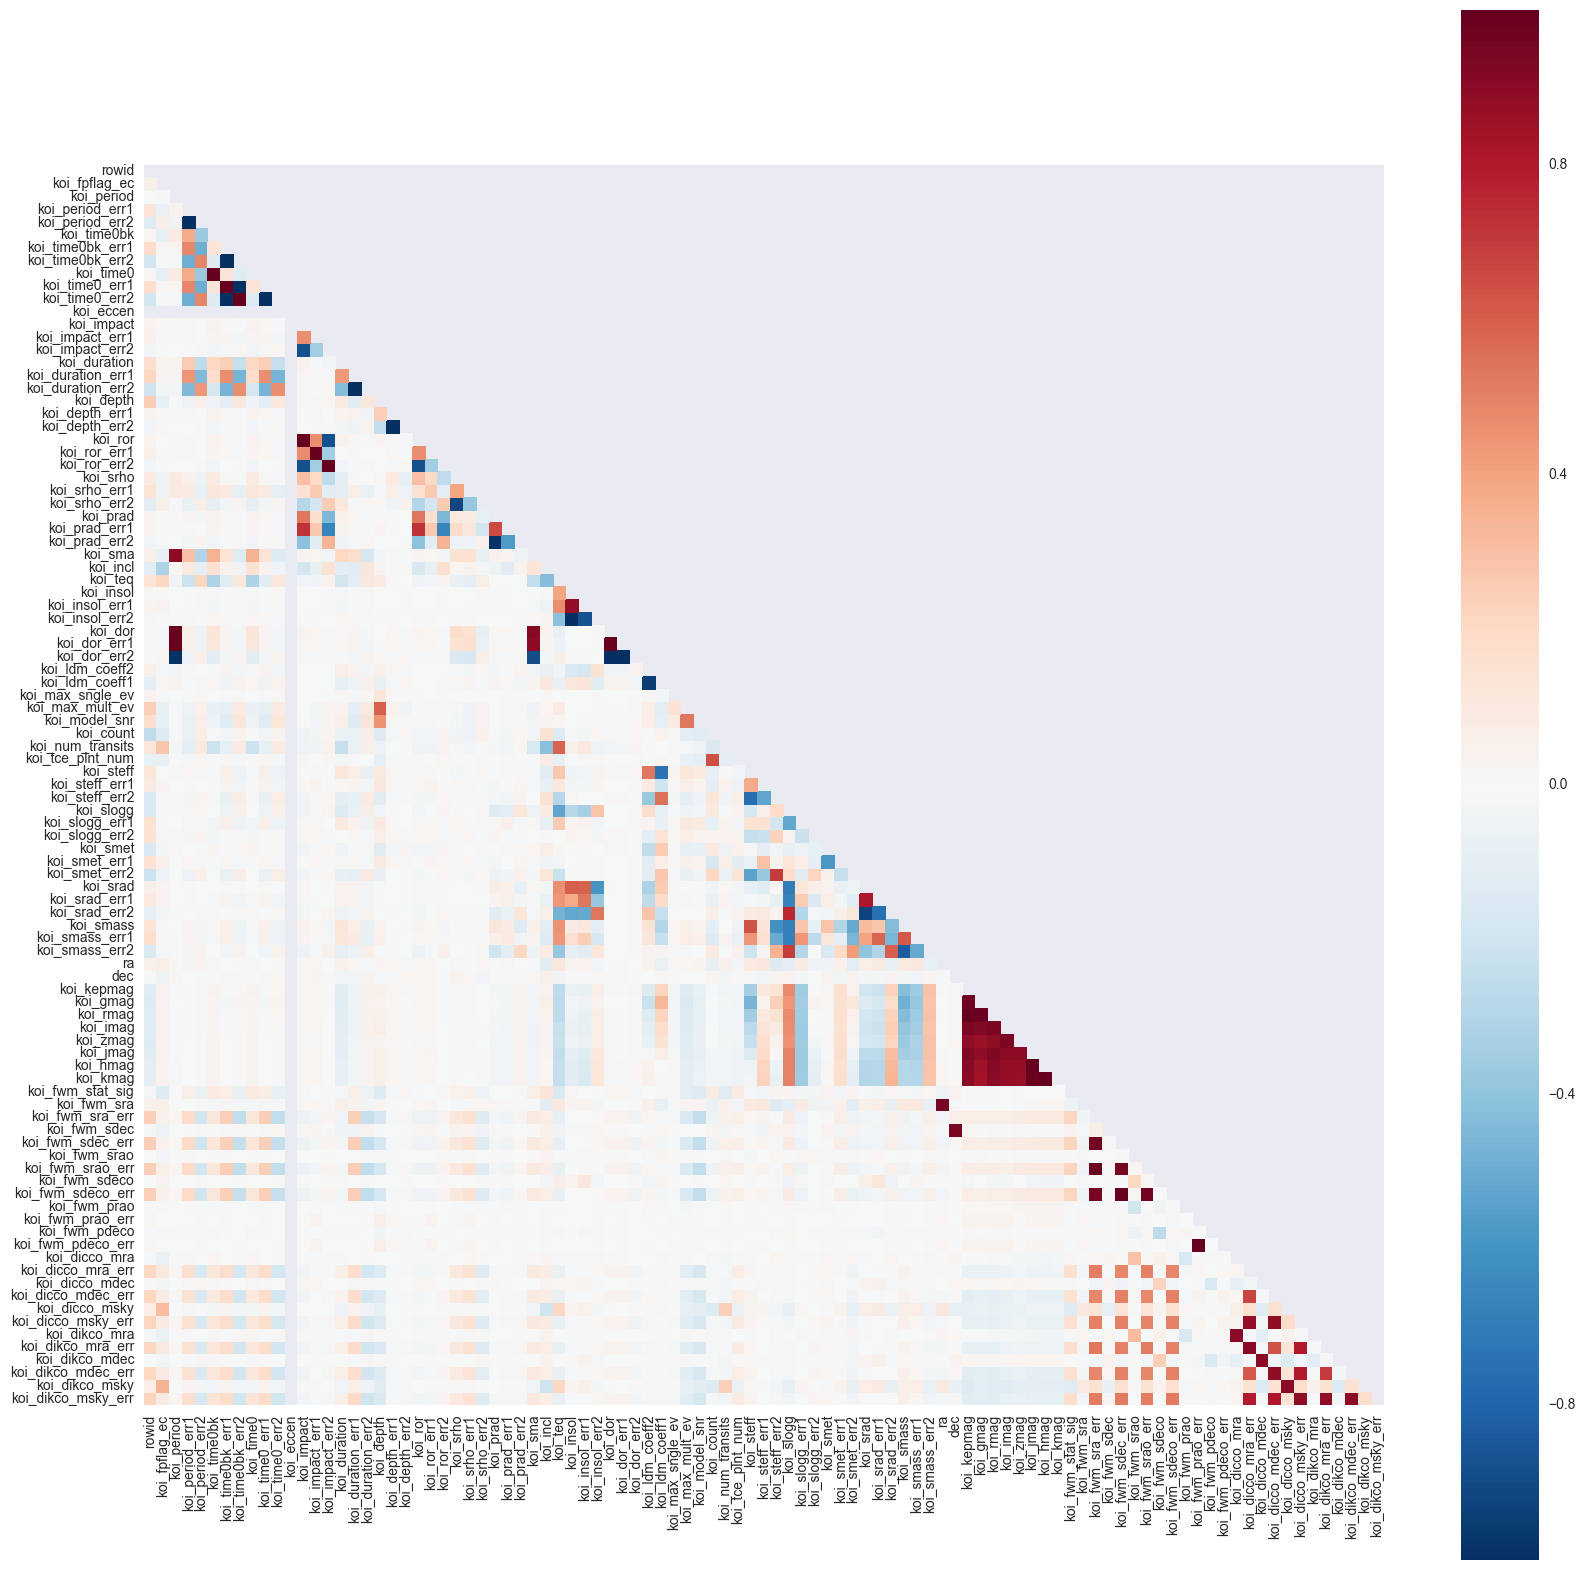

In [20]:
corr = df_quant[df_quant.columns[:]].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize=(20,20))
plt.subplot2grid((1,1), (0,0))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.9, square=True, annot=False)

### Now let's check the categorical variables. Once we have a clean dataframe, we will join them and do one or two visualisations

In [21]:
df_category.columns

Index(['kepoi_name', 'koi_disposition', 'koi_vet_stat', 'koi_vet_date',
       'koi_pdisposition', 'koi_disp_prov', 'koi_fittype', 'koi_limbdark_mod',
       'koi_parm_prov', 'koi_tce_delivname', 'koi_quarters', 'koi_trans_mod',
       'koi_datalink_dvr', 'koi_datalink_dvs', 'koi_sparprov', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co'],
      dtype='object')

In [22]:
df_category.head() #It seems that some of the columns are just null, but indicated with the string 'None'

,kepoi_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_disp_prov,koi_fittype,koi_limbdark_mod,koi_parm_prov,koi_tce_delivname,koi_quarters,koi_trans_mod,koi_datalink_dvr,koi_datalink_dvs,koi_sparprov,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co
0,K00752.01,CONFIRMED,Active,2015-09-18,CANDIDATE,q1_q17_dr24_koi,MCMC,None,q1_q17_dr24_koi,None,None,None,None,None,None,0,0,0
1,K00752.02,CONFIRMED,Active,2015-09-18,CANDIDATE,q1_q17_dr24_koi,MCMC,None,q1_q17_dr24_koi,None,None,None,None,None,None,0,0,0
2,K00753.01,CANDIDATE,Active,2015-09-18,CANDIDATE,q1_q17_dr24_koi,MCMC,None,q1_q17_dr24_koi,None,None,None,None,None,None,0,0,0
3,K00754.01,CANDIDATE,Active,2015-09-18,CANDIDATE,q1_q17_dr24_koi,MCMC,None,q1_q17_dr24_koi,None,None,None,None,None,None,0,0,0
4,K00755.01,CONFIRMED,Active,2015-09-18,CANDIDATE,q1_q17_dr24_koi,MCMC,None,q1_q17_dr24_koi,None,None,None,None,None,None,0,0,0


In [23]:
df_category.dtypes #we should clean those null columns with 'None' but let's do it later

kepoi_name           object
koi_disposition      object
koi_vet_stat         object
koi_vet_date         object
koi_pdisposition     object
koi_disp_prov        object
koi_fittype          object
koi_limbdark_mod     object
koi_parm_prov        object
koi_tce_delivname    object
koi_quarters         object
koi_trans_mod        object
koi_datalink_dvr     object
koi_datalink_dvs     object
koi_sparprov         object
koi_fpflag_nt         int64
koi_fpflag_ss         int64
koi_fpflag_co         int64
dtype: object

### Joining the two dataframes, and let's investigate some of the variables

In [24]:
planets_clean = df_category.join(df_quant)

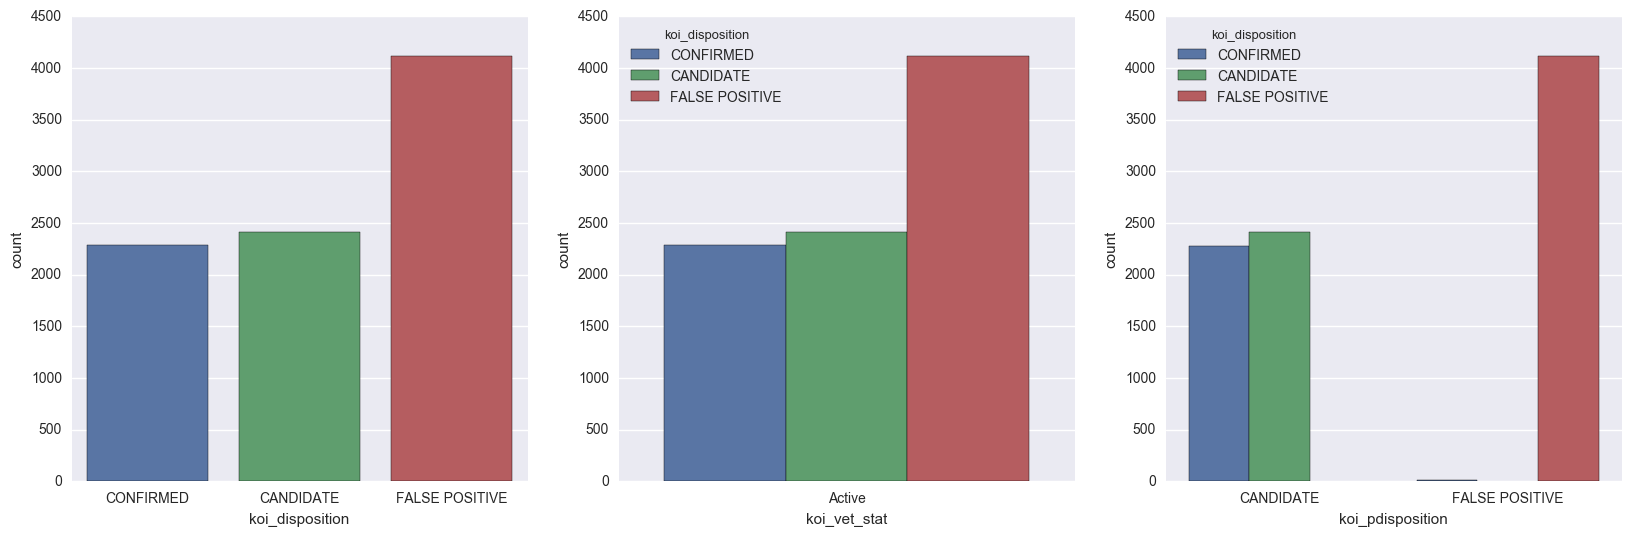

In [25]:
fig = plt.figure(figsize=(20,6))
#
plt.subplot2grid((1,3), (0,0))
sns.countplot(x='koi_disposition', data=planets_clean)
plt.subplot2grid((1,3), (0,1))
sns.countplot(x='koi_vet_stat', hue='koi_disposition', data=planets_clean)
plt.subplot2grid((1,3), (0,2))
sns.countplot(x='koi_pdisposition', hue='koi_disposition', data=planets_clean)

### There were three columns that could potentially give similar information, as they had text strings that gave a similar idea: 'confirmed', 'active', 'candidate, etc.<br>We can see after the graph that colunm 'koi_vet_stat' only has one value and we could discard it as it does not give extra info to our analysis (perhaps it does to the people in the Nasa office as it labels some process).<br>We also notice that for when the variable 'koi_pdisposition' refers to ''CANDIDATE', it excludes the value 'FALSE POSITIVE' of the column 'koi_disposition'. It seems to be perhaps a preliminary classification before the permanent one given in 'koi_disposition'? 

### Let's check a couple of variables that could describe something physical (a first guess, as I didn't read in depth the meaning of each variable!)

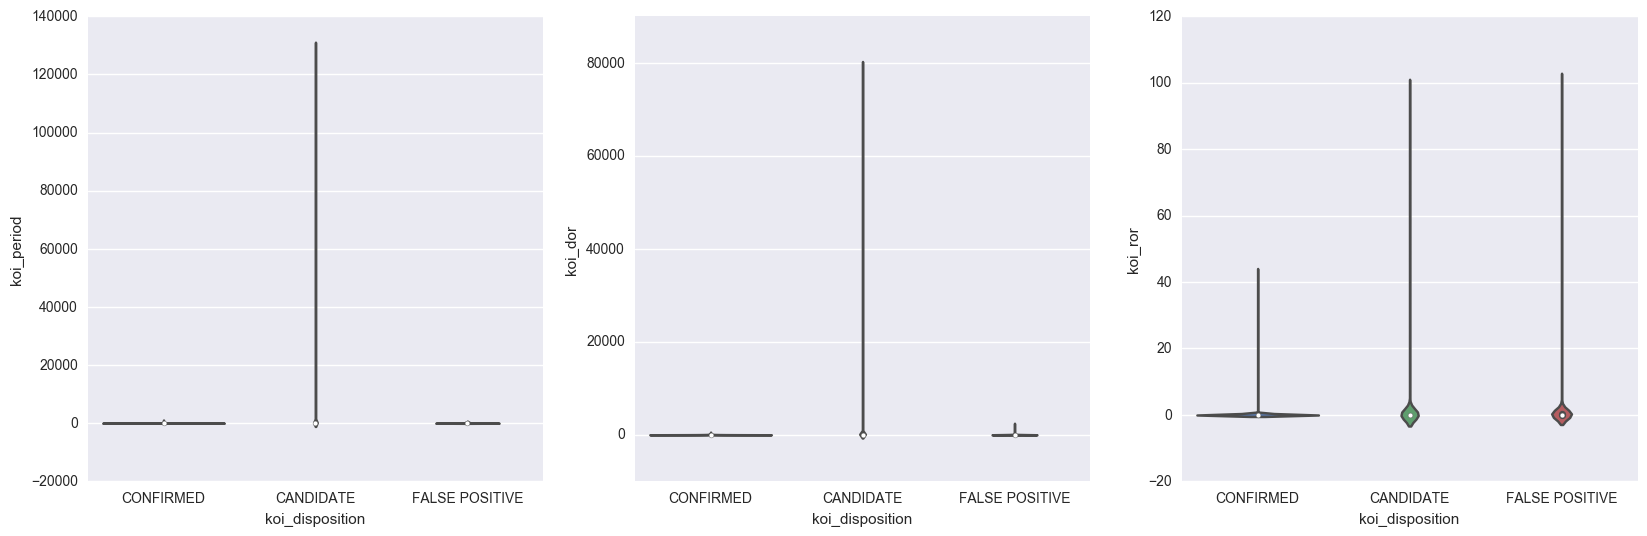

In [26]:
fig = plt.figure(figsize=(20,6))
#
plt.subplot2grid((1,3), (0,0))
sns.violinplot(x='koi_disposition', y='koi_period', data=planets_clean)
plt.subplot2grid((1,3), (0,1))
sns.violinplot(x='koi_disposition', y='koi_dor', data=planets_clean)
plt.subplot2grid((1,3), (0,2))
sns.violinplot(x='koi_disposition', y='koi_ror', data=planets_clean)

### In appearance, this graph does not tell much. However, it says that we must either (1) Check the values of these variables (nulls flagged as zeroes?) and/or (2) transform our data so it can display in a linear scale. 

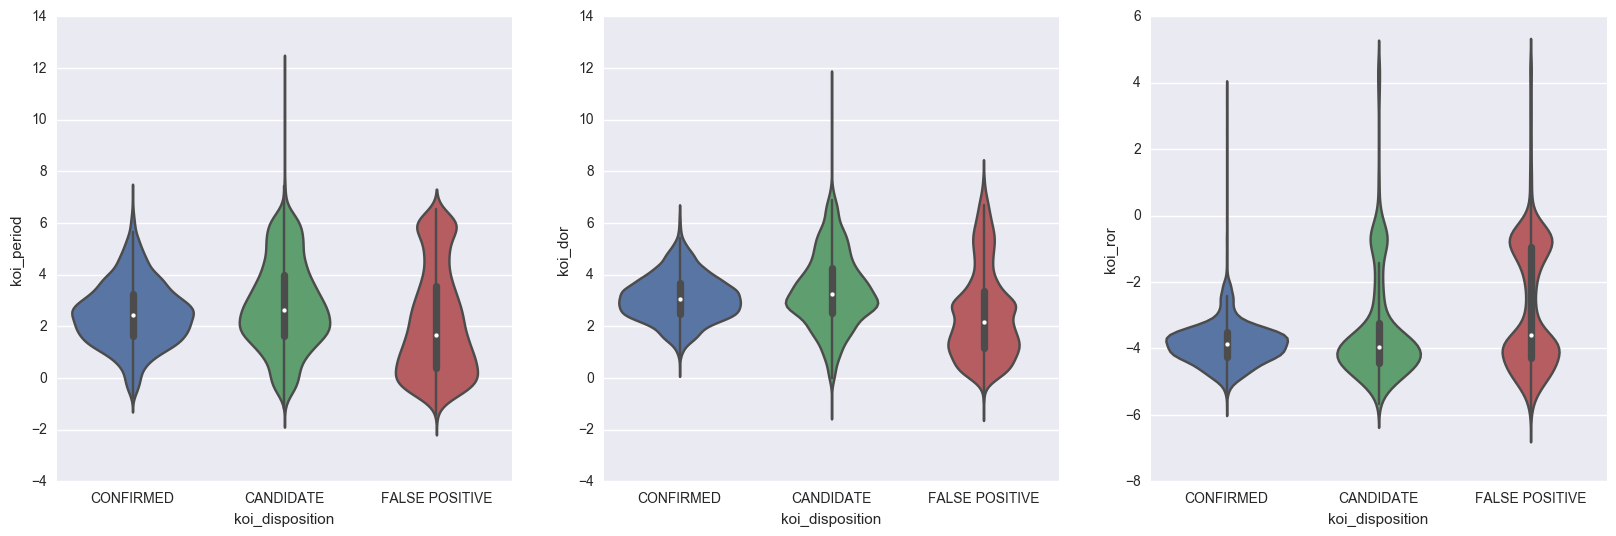

In [27]:
#Let's try a logarithmic transform
planets_clean.koi_period = np.log(planets_clean.koi_period)
planets_clean.koi_dor = np.log(planets_clean.koi_dor)
planets_clean.koi_ror = np.log(planets_clean.koi_ror)
#
fig = plt.figure(figsize=(20,6))
#
plt.subplot2grid((1,3), (0,0))
sns.violinplot(x='koi_disposition', y='koi_period', data=planets_clean)
plt.subplot2grid((1,3), (0,1))
sns.violinplot(x='koi_disposition', y='koi_dor', data=planets_clean)
plt.subplot2grid((1,3), (0,2))
sns.violinplot(x='koi_disposition', y='koi_ror', data=planets_clean)

### It is encouraging that the distributions for these physical parameters has a different shape when it comes to the false positives. In a similar way, the comfirmed exoplanets seem to have a lower standard deviation in each of the parameters.

In [28]:
df_quant.columns.values

array(['rowid', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_time0', 'koi_time0_err1', 'koi_time0_err2',
       'koi_eccen', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2',
       'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_ror',
       'koi_ror_err1', 'koi_ror_err2', 'koi_srho', 'koi_srho_err1',
       'koi_srho_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_sma', 'koi_incl', 'koi_teq', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_dor', 'koi_dor_err1', 'koi_dor_err2',
       'koi_ldm_coeff2', 'koi_ldm_coeff1', 'koi_max_sngle_ev',
       'koi_max_mult_ev', 'koi_model_snr', 'koi_count', 'koi_num_transits',
       'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_smet',
       'koi_smet_err1', 'koi_sme

In [29]:
df_quant.koi_dor.describe()

count     8826.000000
mean        74.282040
std        862.224323
min          0.373000
25%          6.190325
50%         16.820000
75%         43.400000
max      79614.000000
Name: koi_dor, dtype: float64

### We can encode osme of the categorical variables and have a 'panoramic view' of our dataset... for example, we can start having a feeling of which values of 'period' are typical of a candidate planet.

In [36]:
def encode(val):
    if val == 'FALSE POSITIVE':
        return 1
    elif val == 'CANDIDATE':
        return 2
    else:
        return 3
    
planets_clean['koi_disposition_encode'] = planets_clean['koi_disposition'].apply(encode)

In [ ]:
#let's transform back the period...
planets_clean.koi_period = np.exp(planets_clean.koi_period)

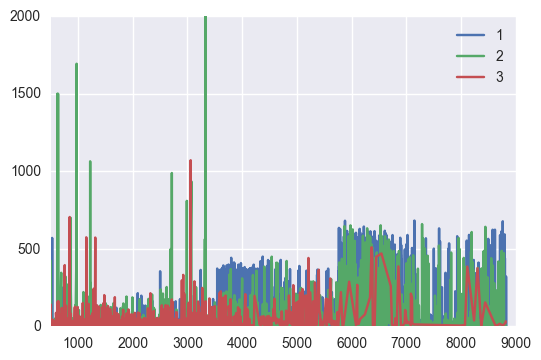

In [37]:
#
planets_clean.groupby(['koi_disposition_encode'])['koi_period'].plot()
plt.xlim([500,9000])
plt.ylim([0,2000])
plt.legend(loc="upper right")

### We can do the same with other variables...

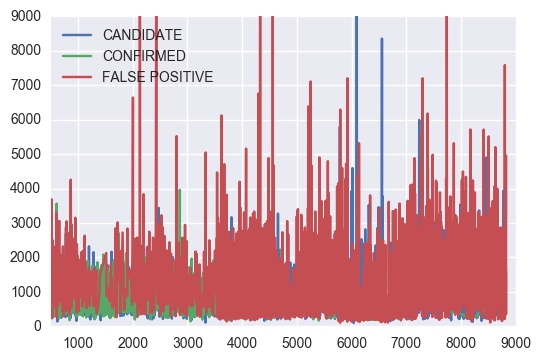

In [35]:
planets_clean.groupby(['koi_disposition'])['koi_teq'].plot()
plt.xlim([500,9000])
plt.ylim([0,9000])
plt.legend(loc="upper left")

### That's all folks. I hope you enjoyed my notebook. Looking forward to progressing my application to the next stage!<br>Gus Hinestrosa.